In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
cor = df.corr()

In [10]:
cor

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

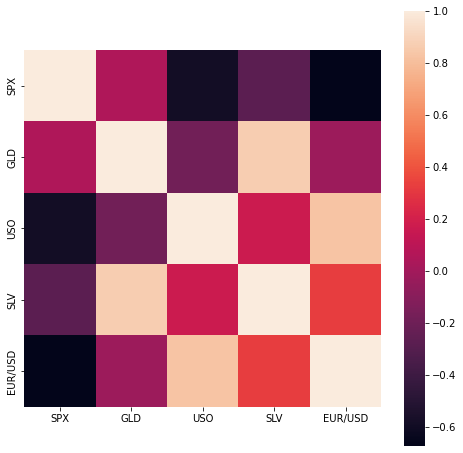

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,cbar=True,square=True)

<AxesSubplot:xlabel='GLD', ylabel='Density'>

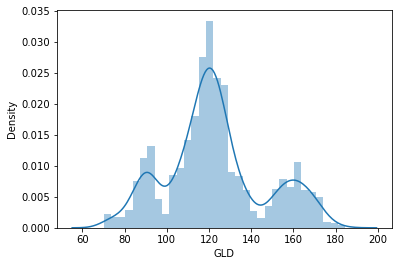

In [12]:
sns.distplot(df['GLD'])

In [13]:
x = df.drop(['Date','GLD'],axis=1)

In [14]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y = df['GLD']

In [16]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .30, random_state=2)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf = RandomForestRegressor(n_estimators=100)

In [21]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
rf_pred = rf.predict(x_test)

In [23]:
rf_pred 

array([168.74689972,  82.0320001 , 115.72430003, 127.62960106,
       120.45710152, 154.7046986 , 150.36470065, 126.08740006,
       118.11879898, 126.12010086, 116.30590116, 172.41470094,
       142.78019919, 167.71539868, 115.27750014, 117.77480037,
       140.04580291, 170.14880057, 160.38060366, 160.40899936,
       154.95699944, 125.52969969, 174.95099971, 156.71920259,
       125.08510069,  93.7002992 ,  77.29790018, 120.64300012,
       119.37180087, 167.28230049,  88.54529923, 125.37530173,
        91.05270097, 117.85759958, 121.134399  , 136.21880115,
       115.41820116, 116.98480022, 147.76799914, 107.053101  ,
       104.28530188,  87.16739764, 126.46470034, 117.59869929,
       155.02279926, 119.97429998, 108.22850132, 108.0734978 ,
        93.17889946, 127.26649748,  75.31690016, 113.64149958,
       120.93220005, 111.13139833, 118.89869882, 120.3492999 ,
       158.6427009 , 166.49470184, 147.00449706,  86.54029994,
        94.41610014,  86.99859859,  90.67010026, 118.83

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
print('MSE =',mean_squared_error(y_test,rf_pred))

MSE = 5.370794840065951


In [26]:
print('MAE =',mean_absolute_error(y_test,rf_pred))

MAE = 1.3497607487336218


In [27]:
print('RMSE =',np.sqrt(mean_squared_error(y_test,rf_pred)))

RMSE = 2.3174975383084986


In [28]:
print('R^2 = ',r2_score(y_test,rf_pred))

R^2 =  0.9894738235146576


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt = DecisionTreeRegressor()

In [31]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
dt_pred = dt.predict(x_test)

In [33]:
print('MSE =',mean_squared_error(y_test,dt_pred))

MSE = 12.512286929894392


In [34]:
print('MAE =',mean_absolute_error(y_test,dt_pred))

MAE = 1.7241716535662301


In [35]:
print('RMSE =',np.sqrt(mean_squared_error(y_test,dt_pred)))

RMSE = 3.5372711134283152


In [36]:
print('R^2 = ',r2_score(y_test,dt_pred))

R^2 =  0.975477272101927
